In [7]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [8]:
coon = sqlite3.connect("../data/adult.db")
df = pd.read_sql_query('''select * from adult;''', coon)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_adult        48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       46043 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education_num   48842 non-null  int64 
 6   marital_status  48842 non-null  object
 7   occupation      46033 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital_gain    48842 non-null  int64 
 12  capital_loss    48842 non-null  int64 
 13  hours_per_week  48842 non-null  int64 
 14  native_country  47985 non-null  object
 15  class           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [10]:
df.describe()

,ID_adult,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,24421.500000,38.641763,1.896625e+05,10.078089,1079.067626,87.502314,40.421154
std,14099.615261,13.712688,1.056063e+05,2.570973,7452.019058,403.004552,12.392477
min,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,12211.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,24421.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,36631.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,48842.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
sexo = dict(df['sex'].value_counts())

In [40]:
print(f"na tabela, temos no total {df.shape[0]} registro, {sexo['male']} sao homens, representando {round((sexo['male']/df.shape[0])*100, 2)}%" + 
f" e mulheres representam {round((sexo['female']/df.shape[0])*100, 2)}%, total de {sexo['female']}")

na tabela, temos no total 48842 registro, 32650 sao homens, representando 66.85% e mulheres representam 33.15%, total de 16192


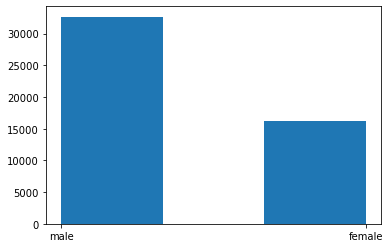

In [41]:
plt.hist(df['sex'], bins=3)
plt.show() 

In [42]:
clase = dict(df['class'].value_counts())

In [44]:
f"na tabela, {clase['<=50k']} ({round((clase['<=50k']/df.shape[0])*100, 2)}%) tem uma renda inferior a 50 mil dolares, e apenas {clase['>50k']} ({round((clase['>50k']/df.shape[0])*100, 2)}%) uma renda superior a 50 mil"

'na tabela, 37155 (76.07%) tem uma renda inferior a 50 mil dolares, e apenas 11687 (23.93%) uma renda superior a 50 mil'

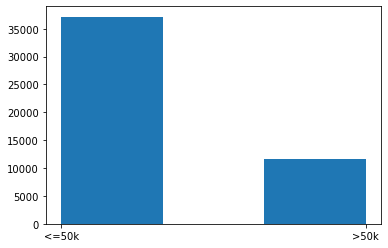

In [45]:
plt.hist(df['class'], bins=3)
plt.show() 

In [46]:
mulheres = df[(df['sex'] == "female") & (df['class'] == ">50k")]
homens = df[(df['sex'] == "male") & (df['class'] == ">50k")]

In [48]:
f"{mulheres.shape[0]} mulheres ({round((mulheres.shape[0]/clase['>50k'])*100, 2)}%) tem uma renda superior a 50 mil"

'1769 mulheres (15.14%) tem uma renda superior a 50 mil'

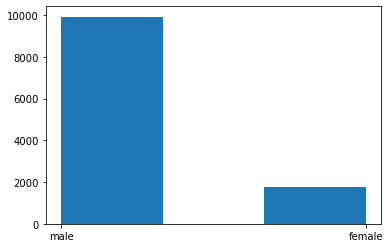

In [49]:
plt.hist(df[df['class'] == ">50k"]["sex"], bins=3)
plt.show() 

In [50]:
brancos = df[(df['class'] == ">50k") & (df['race'] == "white")]

In [51]:
f"nos dados, {brancos.shape[0]} ({round((brancos.shape[0]/clase['>50k'])*100, 2)}%) brancos representam uma renda maior que 50 mil"

'nos dados, 10607 (90.76%) brancos representao uma renda maior que 50 mil'

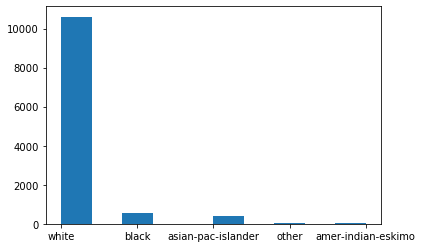

In [52]:
plt.hist(df[df['class'] == ">50k"]["race"])
plt.show() 

In [69]:
us = df[(df['class'] == ">50k") & (df['native_country'] == "united-states")]

In [74]:
f"{us.shape[0]} ({round((us.shape[0]/clase['>50k'])*100, 2)}%) das pessoas que tiveram uma renda acima de 50 mil são de estadunidenses"

'10694 (91.5%) das pessoas que tiveram uma renda acima de 50 mil são de estadunidenses'

In [64]:
df["hours_per_week"].describe()

count    48842.000000
mean        40.421154
std         12.392477
min          0.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [ ]:
f"em horas trabalhadas por semana, temos uma mediana de 40h"

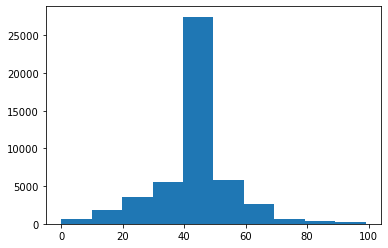

In [65]:
plt.hist(df["hours_per_week"])
plt.show() 